In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='whitegrid')

In [13]:
# Загрузка данных
tfidf_df = pd.read_csv("data/metrics/tfidf.csv")
tfidf_df_extra = pd.read_csv("data/metrics/tfidf_extra.csv", header=None)
tfidf_df_extra.columns = tfidf_df.columns.values
ft_df = pd.read_csv("data/metrics/fasttext.csv", header=None)
ft_df.columns = tfidf_df.columns.values
ft_df_extra = pd.read_csv("data/metrics/fasttext_extra.csv", header=None)
ft_df_extra.columns = tfidf_df.columns.values
transformers_df = pd.read_csv("data/metrics/transformers.csv")

In [14]:
# Создание единого датафрейма
metrics = pd.concat([tfidf_df, ft_df, tfidf_df_extra, ft_df_extra, transformers_df], ignore_index=True)
metrics

,model,accuracy,f1_avg,f1_bug,f1_enh,f1_doc,f1_que,extra_processed
0,TF-IDF + KNN,0.480687,0.480687,0.444802,0.423343,0.550073,0.473636,False
1,TF-IDF + Логистическая регрессия,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
2,TF-IDF + Машина опорных векторов,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
3,TF-IDF + Наивный байесовский классификатор,0.667750,0.667750,0.687538,0.643487,0.706767,0.638435,False
4,TF-IDF + Дерево решений,0.502250,0.502250,0.581963,0.510887,0.507740,0.370066,False
5,TF-IDF + Случайный лес,0.554500,0.554500,0.606736,0.530650,0.570174,0.503800,False
6,fasttext,0.732688,0.732687,0.731522,0.727784,0.771141,0.702101,False
7,TF-IDF + KNN,0.457437,0.457437,0.450352,0.425988,0.540917,0.355485,True
8,TF-IDF + Логистическая регрессия,0.705125,0.705125,0.715294,0.691648,0.751728,0.664150,True
9,TF-IDF + Машина опорных векторов,0.705125,0.705125,0.715294,0.691648,0.751728,0.664150,True


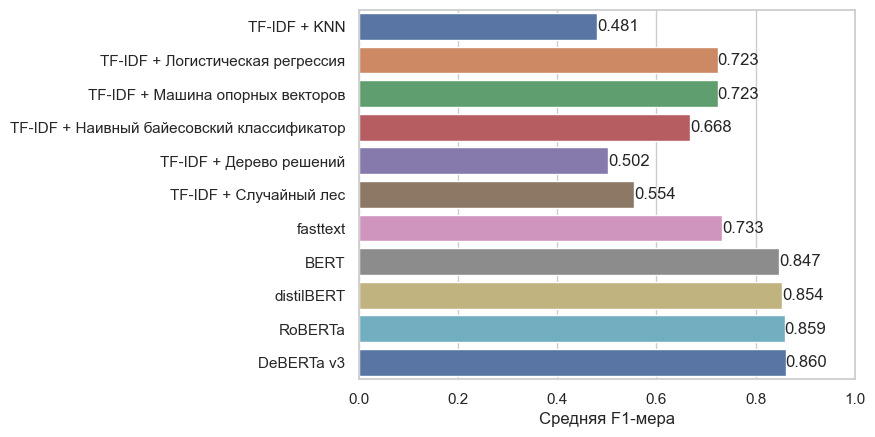

In [24]:
_, ax = plt.subplots()
bar = sns.barplot(metrics[metrics.extra_processed == False],
                  x="f1_avg", y="model", palette="deep")
ax.set_xlim(0, 1)
ax.set_xlabel("Средняя F1-мера")
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_ylabel("")
plt.show()